In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Problem Statement

# Data Gathering

In [4]:
df = pd.read_csv("supply_chain_dataset.csv",encoding='latin1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [20]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [39]:
df['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [38]:
df['shipping date (DateOrders)'].unique()

array(['2/3/2018 22:56', '1/18/2018 12:27', '1/17/2018 12:06', ...,
       '1/25/2016 2:47', '1/23/2016 7:10', '1/21/2016 5:56'], dtype=object)

In [37]:
df['Product Status'].unique()

array([0], dtype=int64)

In [36]:
df['Product Price'].unique()

array([ 327.75      ,   59.99000168,   39.99000168,   50.        ,
         44.99000168,   54.97000122,   99.98999786,   21.98999977,
         31.98999977,   30.        ,   47.99000168,   89.98999786,
         29.98999977,  129.9900055 ,  299.980011  ,  252.8800049 ,
        452.0400085 , 1500.        ,  999.9899902 ,   79.98999786,
         25.        ,   24.98999977,   15.98999977,  215.8200073 ,
        461.480011  ,  210.8500061 ,   34.99000168,   27.98999977,
         70.        ,   19.98999977,   51.99000168,  399.9899902 ,
        299.9899902 ,  357.1000061 ,   59.08000183,  199.        ,
        399.980011  ,   31.07999992,  109.9499969 ,  164.3800049 ,
         11.28999996,   94.98999786,   17.98999977,   99.        ,
        532.5800171 ,   22.        ,  149.9900055 ,  199.9900055 ,
         84.40000153,  293.0400085 ,  249.9900055 ,  260.6499939 ,
         39.75      ,   99.94999695,  329.9899902 ,  159.9900055 ,
        599.9899902 ,  189.        ,  124.9899979 , 1999.98999

In [35]:
df['Product Name'].unique()

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Nike Men's Free 5.0+ Running Shoe",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Brooks Women's Ghost 6 Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera', 'Dell Laptop',
       'SOLE E25 Elliptical', 'Elevation Training Mask 2.0',
       "adidas Men's Germ

In [34]:
df['Product Card Id'].unique()

array([1360,  365,  627,  502,  278,  249,  191,  917,  828,  642,  818,
        825,  306,  977,   44,  251,  403,  957, 1352, 1349, 1351,   60,
         24,  567,  893,  924,  905,  564,  885, 1363, 1353, 1357,  906,
        886,  926,  116,  235,  273,  282,  359,  565,  572,  804,  822,
        835,  276,  823,  203,  364, 1350,  897,   37,  172,  810,  821,
         93, 1347,  305, 1004, 1346,   58,  311,  303, 1354, 1348,   78,
        258,  797,  981, 1355,  135,  134,  845,  982,  625, 1359, 1356,
        607, 1358, 1362,  295,  127,   61,   35,  858,  860,  216,   19,
        226,  208,  793,  792,  786,  778,  777,  775,  773,  771,  768,
        743,  730,  728,  725,  724,  715,  705,  703,  691,  677,  671,
        666,  652,  647,  646, 1361, 1073, 1059, 1014], dtype=int64)

In [32]:
df['Order State'].unique()

array(['Java Occidental', 'Rajastán', 'Queensland', ...,
       'Bistrita-Nasaud', 'Tottori', 'Khorezm'], dtype=object)

In [33]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [31]:
df['Order Profit Per Order']

0          91.250000
1        -249.089996
2        -247.779999
3          22.860001
4         134.210007
             ...    
180514     40.000000
180515   -613.770019
180516    141.110001
180517    186.229996
180518    168.949997
Name: Order Profit Per Order, Length: 180519, dtype: float64

In [30]:
df['Order Item Total'].unique()

array([314.6400146, 311.3599854, 309.7200012, ..., 298.769989 ,
       403.7099915, 474.7600098])

In [29]:
df['Order Item Quantity'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [28]:
df['Order City'].unique()

array(['Bekasi', 'Bikaner', 'Townsville', ..., 'Tongling', 'Liuyang',
       'Nashua'], dtype=object)

In [26]:
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [27]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [25]:
df['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS', 'AR', 'OK', 'AL', 'IA',
       '95758', '91732'], dtype=object)

In [24]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [23]:
df['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [19]:
df['Customer City'].unique()

array(['Caguas', 'San Jose', 'Los Angeles', 'Tonawanda', 'Miami',
       'San Ramon', 'Freeport', 'Salinas', 'Peabody', 'Canovanas',
       'Paramount', 'Mount Prospect', 'Long Beach', 'Rancho Cordova',
       'Billings', 'Wilkes Barre', 'Roseville', 'Bellflower', 'Wheaton',
       'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Panorama City',
       'Atlanta', 'Fremont', 'Rochester', 'Bayamon', 'Guayama',
       'Juana Diaz', 'Fort Washington', 'Bakersfield', 'Corona',
       'Cincinnati', 'Germantown', 'Carrollton', 'Houston', 'Ewa Beach',
       'Lakewood', 'Rome', 'Vista', 'Fort Worth', 'Fond Du Lac',
       'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Honolulu',
       'Oceanside', 'North Tonawanda', 'Clovis', 'Jamaica',
       'Granite City', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York',
       'Aurora', 'Simi Valley', 'Silver Spring', 'Saint Paul',
       'San Antonio', 'Bronx', 'Greenville', 'Morristown', 'San Diego',
       'Oxnard', 'Albuquerque', 'Amarillo', 'Lutz', 'B

In [16]:
df['Late_delivery_risk'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46],
      dtype=int64)

In [18]:
df['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

# Exploratory Data Analysis

In [9]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [11]:
df['Days for shipping (real)'].unique()

array([3, 5, 4, 2, 6, 0, 1], dtype=int64)

In [12]:
df['Days for shipment (scheduled)'].unique()

array([4, 1, 2, 0], dtype=int64)

In [13]:
df['Benefit per order'].unique()

array([  91.25     , -249.0899963, -247.7799988, ..., -103.9700012,
       -237.5899963, -337.1000061])

In [14]:
df['Sales per customer'].unique()

array([314.6400146, 311.3599854, 309.7200012, ..., 298.769989 ,
       403.7099915, 474.7600098])

In [15]:
df['Delivery Status'].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [5]:
df.drop("Product Description",axis = 1,inplace = True)

In [6]:
df.drop("Order Zipcode",axis = 1,inplace = True)

In [7]:
df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

### 14 Customer Id

In [5]:
df['Customer Id']

0         20755
1         19492
2         19491
3         19490
4         19489
          ...  
180514     1005
180515     9141
180516      291
180517     2813
180518     7547
Name: Customer Id, Length: 180519, dtype: int64

In [6]:
df['Customer Id'].unique()

array([20755, 19492, 19491, ..., 18579, 16244,  2677], dtype=int64)

In [7]:
df['Customer Id'].value_counts()

5654     47
5004     45
10591    45
5715     44
3708     44
         ..
13486     1
17887     1
15952     1
13905     1
14375     1
Name: Customer Id, Length: 20652, dtype: int64

In [9]:
df['Customer Id'].isna().sum()

0

<AxesSubplot:>

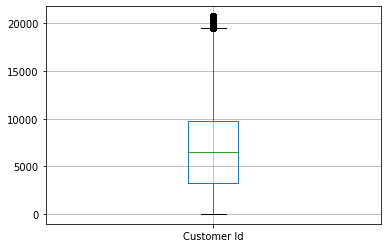

In [13]:
df[['Customer Id']].boxplot()

### 15 Customer Lname

In [16]:
df['Customer Lname']

0          Holloway
1              Luna
2         Maldonado
3              Tate
4         Hendricks
            ...    
180514     Peterson
180515        Clark
180516        Smith
180517        Smith
180518       Ortega
Name: Customer Lname, Length: 180519, dtype: object

In [17]:
df['Customer Lname'].unique()

array(['Holloway', 'Luna', 'Maldonado', ..., 'Kiney', 'Delan', 'Harri'],
      dtype=object)

In [18]:
df['Customer Lname'].value_counts()

Smith          64104
Johnson          989
Brown            909
Williams         869
Jones            859
               ...  
Dill               1
Brandy             1
Cash               1
Godinho            1
Gerginokish        1
Name: Customer Lname, Length: 1109, dtype: int64

In [19]:
df['Customer Lname'].isna().sum()

8

### 15 Customer Password

In [24]:
df['Customer Password']

0         XXXXXXXXX
1         XXXXXXXXX
2         XXXXXXXXX
3         XXXXXXXXX
4         XXXXXXXXX
            ...    
180514    XXXXXXXXX
180515    XXXXXXXXX
180516    XXXXXXXXX
180517    XXXXXXXXX
180518    XXXXXXXXX
Name: Customer Password, Length: 180519, dtype: object

In [25]:
df['Customer Password'].unique()

array(['XXXXXXXXX'], dtype=object)

In [26]:
df['Customer Password'].value_counts()

XXXXXXXXX    180519
Name: Customer Password, dtype: int64

In [27]:
df['Customer Password'].isna().sum()

0

### 16 Customer Segment

In [28]:
df['Customer Segment']

0            Consumer
1            Consumer
2            Consumer
3         Home Office
4           Corporate
             ...     
180514    Home Office
180515      Corporate
180516      Corporate
180517       Consumer
180518       Consumer
Name: Customer Segment, Length: 180519, dtype: object

In [29]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [30]:
df['Customer Segment'].value_counts()

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

In [31]:
df['Customer Segment'].isna().sum()

0

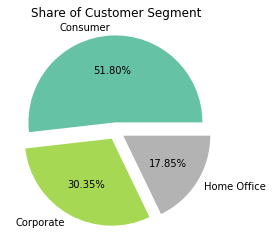

In [37]:
plt.title('Share of Customer Segment')
df['Customer Segment'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1])
plt.ylabel('');

### 17 Customer State

In [40]:
df['Customer State']

0         PR
1         PR
2         CA
3         CA
4         PR
          ..
180514    NY
180515    CA
180516    CT
180517    PR
180518    PR
Name: Customer State, Length: 180519, dtype: object

In [41]:
df['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS', 'AR', 'OK', 'AL', 'IA',
       '95758', '91732'], dtype=object)

In [42]:
df['Customer State'].value_counts()

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64

In [43]:
df['Customer State'].isna().sum()

0

### 18 Customer Street

In [45]:
df['Customer Street']

0           5365 Noble Nectar Island
1                   2679 Rustic Loop
2               8510 Round Bear Gate
3                    3200 Amber Bend
4           8671 Iron Anchor Corners
                     ...            
180514              1322 Broad Glade
180515         7330 Broad Apple Moor
180516            97 Burning Landing
180517    2585 Silent Autumn Landing
180518             697 Little Meadow
Name: Customer Street, Length: 180519, dtype: object

In [46]:
df['Customer Street'].unique()

array(['5365 Noble Nectar Island', '2679 Rustic Loop',
       '8510 Round Bear Gate', ..., '245 Lost Way ', '2455 Merry Hollow ',
       '8621 Broad Forest '], dtype=object)

In [47]:
df['Customer Street'].value_counts()

9126 Wishing Expressway     122
4388 Burning Goose Ridge    117
4720 Noble Hills Wynd       116
2878 Hazy Wagon  Thicket    113
398 Emerald Grove           109
                           ... 
7213 Cozy Quay                1
9899 Silent Court             1
2805 Indian Passage           1
1591 Foggy Meadow             1
5154 Honey Bend               1
Name: Customer Street, Length: 7458, dtype: int64

In [48]:
df['Customer Street'].isna().sum()

0

### 19 Customer Zipcode

In [49]:
df['Customer Zipcode']

0           725.0
1           725.0
2         95125.0
3         90027.0
4           725.0
           ...   
180514    11207.0
180515    93304.0
180516     6010.0
180517      725.0
180518      725.0
Name: Customer Zipcode, Length: 180519, dtype: float64

In [50]:
df['Customer Zipcode'].unique()

array([  725., 95125., 90027., 14150., 33162., 94583., 11520., 93905.,
        1960.,   729., 90723., 60056., 90813., 95670., 59102., 18702.,
       48066., 90706., 60187., 48238., 75220., 17013., 75228., 19702.,
       91402., 30318., 94539., 14609., 75211.,   957.,   784.,   795.,
       20744., 93304., 11368., 45238., 20874., 75006., 77093., 90023.,
       96706.,  8701., 13440., 92083., 76106., 54935., 19139., 91764.,
       32765., 14221., 96822., 92056., 14120., 93611., 11434., 62040.,
        2155., 91766., 85281., 92703., 17402., 80010., 93065., 20904.,
       55124., 78201., 19143., 19149., 10466., 27858.,  7960., 92115.,
       93030., 33147., 87111., 79109., 33549., 97701.,  8816., 29720.,
       91762., 77015., 23666., 10016., 93257., 97223., 44136., 79927.,
       78840., 84010., 98031., 60620.,  2360., 11691., 77088., 19124.,
       48227., 92840., 92105., 60609., 92870., 95148., 44060., 95051.,
        7083., 90805., 92683., 33068., 91702., 33324.,  8540.,  8861.,
      

In [51]:
df['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [52]:
df['Customer Zipcode'].isna().sum()

3

<AxesSubplot:>

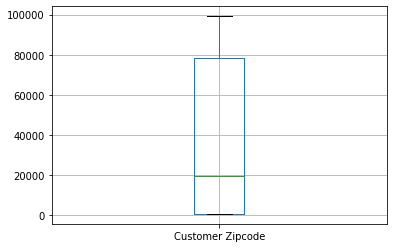

In [53]:
df[['Customer Zipcode']].boxplot()

<AxesSubplot:xlabel='Customer Zipcode'>

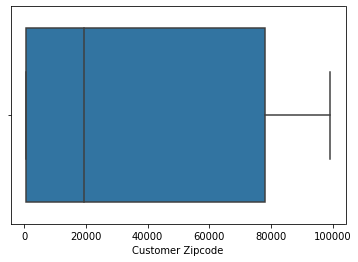

In [54]:
sns.boxplot(x = df['Customer Zipcode'])

### 20 Department Id

In [55]:
df['Department Id']

0         2
1         2
2         2
3         2
4         2
         ..
180514    7
180515    7
180516    7
180517    7
180518    7
Name: Department Id, Length: 180519, dtype: int64

In [56]:
df['Department Id'].unique()

array([ 2,  4,  5,  3,  6,  7, 10,  8,  9, 11, 12], dtype=int64)

In [57]:
df['Department Id'].value_counts()

7     66861
4     48998
5     33220
3     14525
6      9686
2      2479
9      2026
10     1465
11      492
8       405
12      362
Name: Department Id, dtype: int64

In [58]:
df['Department Id'].isna().sum()

0

<AxesSubplot:>

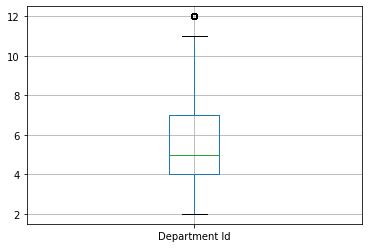

In [59]:
df[['Department Id']].boxplot()

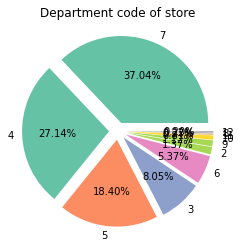

In [63]:
plt.title('Department code of store')
df['Department Id'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1, 0.1])
plt.ylabel('');

### 21 Department Name

In [64]:
df['Department Name']

0          Fitness
1          Fitness
2          Fitness
3          Fitness
4          Fitness
            ...   
180514    Fan Shop
180515    Fan Shop
180516    Fan Shop
180517    Fan Shop
180518    Fan Shop
Name: Department Name, Length: 180519, dtype: object

In [65]:
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [66]:
df['Department Name'].value_counts()

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [67]:
df['Department Name'].isna().sum()

0

### 22 Latitude

In [70]:
df['Latitude']

0         18.251453
1         18.279451
2         37.292233
3         34.125946
4         18.253769
            ...    
180514    40.640930
180515    35.362545
180516    41.629959
180517    18.213350
180518    18.290380
Name: Latitude, Length: 180519, dtype: float64

In [71]:
df['Latitude'].unique()

array([18.2514534 , 18.27945137, 37.29223251, ..., 18.24048233,
       18.26129723, 18.24248505])

In [72]:
df['Latitude'].value_counts()

18.227573    417
39.495914    370
18.227577    300
36.910831    280
26.098499    270
            ... 
18.246212      1
18.212696      1
18.261103      1
18.277172      1
18.216928      1
Name: Latitude, Length: 11250, dtype: int64

In [73]:
df['Latitude'].isna().sum()

0

<AxesSubplot:>

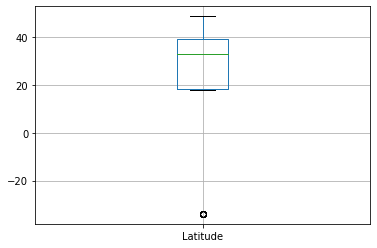

In [75]:
df[['Latitude']].boxplot()

### 23 Longitude

In [77]:
df['Longitude']

0         -66.037056
1         -66.037064
2        -121.881279
3        -118.291016
4         -66.037048
             ...    
180514    -73.942711
180515   -119.018700
180516    -72.967155
180517    -66.370575
180518    -66.370613
Name: Longitude, Length: 180519, dtype: float64

In [78]:
df['Longitude'].unique()

array([ -66.03705597,  -66.0370636 , -121.881279  , ..., -117.8856812 ,
        -87.69457245,  -66.54897308])

In [79]:
df['Longitude'].value_counts()

-66.370613    3821
-66.370575    3523
-66.370590    3522
-66.370506    3465
-66.370552    3417
              ... 
-91.200142       1
-77.089798       1
-83.120888       1
-88.345695       1
-90.351189       1
Name: Longitude, Length: 4487, dtype: int64

In [80]:
df['Longitude'].isna().sum()

0

<AxesSubplot:>

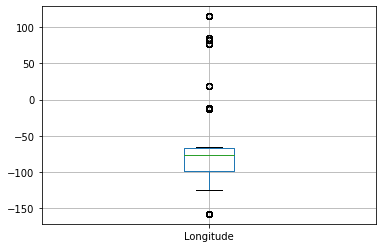

In [81]:
df[['Longitude']].boxplot()

### 24 Market

In [82]:
df['Market']

0         Pacific Asia
1         Pacific Asia
2         Pacific Asia
3         Pacific Asia
4         Pacific Asia
              ...     
180514    Pacific Asia
180515    Pacific Asia
180516    Pacific Asia
180517    Pacific Asia
180518    Pacific Asia
Name: Market, Length: 180519, dtype: object

In [83]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [84]:
df['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [85]:
df['Market'].isna().sum()

0

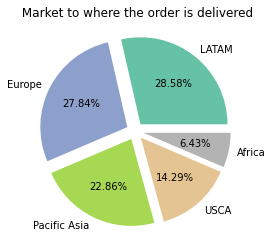

In [87]:
plt.title(' Market to where the order is delivered')
df['Market'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1,0.1, 0.1])
plt.ylabel('');

### 25 Order City

In [88]:
df['Order City']

0             Bekasi
1            Bikaner
2            Bikaner
3         Townsville
4         Townsville
             ...    
180514      Shanghái
180515      Hirakata
180516      Adelaide
180517      Adelaide
180518     Nagercoil
Name: Order City, Length: 180519, dtype: object

In [89]:
df['Order City'].unique()

array(['Bekasi', 'Bikaner', 'Townsville', ..., 'Tongling', 'Liuyang',
       'Nashua'], dtype=object)

In [90]:
df['Order City'].value_counts()

Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Trani               1
Midyat              1
Asti                1
Ipatinga            1
Ormond Beach        1
Name: Order City, Length: 3597, dtype: int64

In [91]:
df['Order City'].isna().sum()

0

### 26 Order Country

In [93]:
df['Order Country']

0         Indonesia
1             India
2             India
3         Australia
4         Australia
            ...    
180514        China
180515        Japón
180516    Australia
180517    Australia
180518        India
Name: Order Country, Length: 180519, dtype: object

In [94]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [95]:
df['Order Country'].value_counts()

Estados Unidos       24840
Francia              13222
México               13172
Alemania              9564
Australia             8497
                     ...  
Eritrea                  2
Guinea Ecuatorial        2
Sáhara Occidental        2
Serbia                   1
Burundi                  1
Name: Order Country, Length: 164, dtype: int64

In [96]:
df['Order Country'].isna().sum()

0

# Feature Engineering 

### 14 Customer Id

In [97]:
q1 = df['Customer Id'].quantile(0.25)
q2 = df['Customer Id'].quantile(0.50)
q3 = df['Customer Id'].quantile(0.75)

iqr =  q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)

print("upper_tail ---->",upper_tail)
print("lower_tail ----->",lower_tail)
print("Median --->",df['Customer Id'].median())
print("Mean --->",df['Customer Id'].mean())

Q1 : 3258.5
Q2 : 6457.0
Q3 : 9779.0
upper_tail ----> 19559.75
lower_tail -----> -6522.25
Median ---> 6457.0
Mean ---> 6691.37949467923


In [98]:
df['Customer Id'].loc[df['Customer Id'] > upper_tail]

0         20755
234       20423
261       20529
267       20655
822       20402
          ...  
176825    20094
176826    19913
176827    20092
176828    19890
176837    20008
Name: Customer Id, Length: 1198, dtype: int64

In [99]:
df['Customer Id'].loc[df['Customer Id'] > upper_tail] = upper_tail

C:\Users\lenovo\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [100]:
df['Customer Id'].loc[df['Customer Id'] > upper_tail]

Series([], Name: Customer Id, dtype: float64)

<AxesSubplot:>

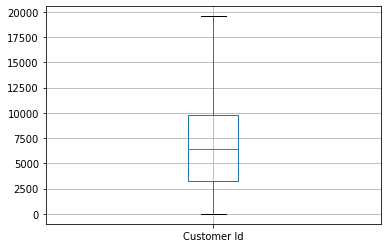

In [101]:
df[['Customer Id']].boxplot()

### 15 Customer Lname

In [ ]:
df['Customer Lname'].isna().sum()

In [105]:
df['Customer Lname'].mode()[0]

'Smith'

In [107]:
df['Customer Lname'].fillna(df['Customer Lname'].mode()[0],inplace = True)

In [108]:
df['Customer Lname'].isna().sum()

0

In [133]:
df = pd.get_dummies(df,columns  =['Customer Lname'])

### 16 Customer Segment

In [110]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [111]:
df['Customer Segment'].replace({'Consumer':0, 'Home Office':1, 'Corporate':2},inplace = True)

In [112]:
df['Customer Segment'].unique()

array([0, 1, 2], dtype=int64)

In [113]:
Customer_Segment_values = {'Consumer':0, 'Home Office':1, 'Corporate':2}
Customer_Segment_values

{'Consumer': 0, 'Home Office': 1, 'Corporate': 2}

### 17 Customer State

In [114]:
df['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS', 'AR', 'OK', 'AL', 'IA',
       '95758', '91732'], dtype=object)

In [115]:
df['Customer State'].replace({'PR':0, 'CA':1, 'NY':2, 'FL':3, 'MA':4, 'IL':5, 'MT':6, 'PA':7,
                'MI':8, 'TX':9, 'DE':10, 'GA':11, 'MD':12, 'OH':13, 'HI':14, 'NJ':15,
                'WI':16, 'AZ':17, 'CO':18, 'MN':19, 'NC':20, 'NM':21,'OR':22, 'SC':23, 'VA':24, 
                'UT':25, 'WA':26, 'KY':27, 'WV':28, 'RI':29, 'CT':30, 'LA':31,'TN':32,'DC':33, 
                'ND':34, 'MO':35, 'IN':36, 'ID':37, 'NV':38, 'KS':39, 'AR':40, 'OK':41, 'AL':42,
                              'IA':43,'95758':44, '91732':45},inplace = True)

In [117]:
Customer_State_values = {'PR':0, 'CA':1, 'NY':2, 'FL':3, 'MA':4, 'IL':5, 'MT':6, 'PA':7,
                'MI':8, 'TX':9, 'DE':10, 'GA':11, 'MD':12, 'OH':13, 'HI':14, 'NJ':15,
                'WI':16, 'AZ':17, 'CO':18, 'MN':19, 'NC':20, 'NM':21,'OR':22, 'SC':23, 'VA':24, 
                'UT':25, 'WA':26, 'KY':27, 'WV':28, 'RI':29, 'CT':30, 'LA':31,'TN':32,'DC':33, 
                'ND':34, 'MO':35, 'IN':36, 'ID':37, 'NV':38, 'KS':39, 'AR':40, 'OK':41, 'AL':42,
                              'IA':43,'95758':44, '91732':45}

Customer_State_values

{'PR': 0,
 'CA': 1,
 'NY': 2,
 'FL': 3,
 'MA': 4,
 'IL': 5,
 'MT': 6,
 'PA': 7,
 'MI': 8,
 'TX': 9,
 'DE': 10,
 'GA': 11,
 'MD': 12,
 'OH': 13,
 'HI': 14,
 'NJ': 15,
 'WI': 16,
 'AZ': 17,
 'CO': 18,
 'MN': 19,
 'NC': 20,
 'NM': 21,
 'OR': 22,
 'SC': 23,
 'VA': 24,
 'UT': 25,
 'WA': 26,
 'KY': 27,
 'WV': 28,
 'RI': 29,
 'CT': 30,
 'LA': 31,
 'TN': 32,
 'DC': 33,
 'ND': 34,
 'MO': 35,
 'IN': 36,
 'ID': 37,
 'NV': 38,
 'KS': 39,
 'AR': 40,
 'OK': 41,
 'AL': 42,
 'IA': 43,
 '95758': 44,
 '91732': 45}

### Customer Street

In [119]:
df['Customer Street']

0           5365 Noble Nectar Island
1                   2679 Rustic Loop
2               8510 Round Bear Gate
3                    3200 Amber Bend
4           8671 Iron Anchor Corners
                     ...            
180514              1322 Broad Glade
180515         7330 Broad Apple Moor
180516            97 Burning Landing
180517    2585 Silent Autumn Landing
180518             697 Little Meadow
Name: Customer Street, Length: 180519, dtype: object

In [135]:
df = pd.get_dummies(df,columns = ['Customer Street'])

### 20 Customer Zipcode

### 21 Department Id

### 22 Department Name

In [120]:
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [121]:
df['Department Name'].replace({'Fitness':0, 'Apparel':1, 'Golf':2, 'Footwear':3, 'Outdoors':4,
                               'Fan Shop':5,'Technology':6, 'Book Shop':7, 'Discs Shop':8, 
                               'Pet Shop':9,'Health and Beauty ':10},inplace = True)

In [122]:
Department_Name_values = {'Fitness':0, 'Apparel':1, 'Golf':2, 'Footwear':3, 'Outdoors':4,
                               'Fan Shop':5,'Technology':6, 'Book Shop':7, 'Discs Shop':8, 
                               'Pet Shop':9,'Health and Beauty ':10}
Department_Name_values

{'Fitness': 0,
 'Apparel': 1,
 'Golf': 2,
 'Footwear': 3,
 'Outdoors': 4,
 'Fan Shop': 5,
 'Technology': 6,
 'Book Shop': 7,
 'Discs Shop': 8,
 'Pet Shop': 9,
 'Health and Beauty ': 10}

In [123]:
df['Department Name'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### 23 Market

In [124]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [125]:
df['Market'].replace({'Pacific Asia':0, 'USCA':1, 'Africa':2, 'Europe':3, 'LATAM':4},inplace = True)

In [127]:
Market_values = {'Pacific Asia':0, 'USCA':1, 'Africa':2, 'Europe':3, 'LATAM':4}
Market_values

{'Pacific Asia': 0, 'USCA': 1, 'Africa': 2, 'Europe': 3, 'LATAM': 4}

In [128]:
df['Market']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: Market, Length: 180519, dtype: int64

### 24 Order City

In [129]:
df = pd.get_dummies(df,columns = ['Order City'])

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order City_Zlatoust,Order City_Zunyi,Order City_Zurich,Order City_Zwedru,Order City_Zwickau,Order City_Zwolle,Order City_eMbalenhle,Order City_Águas Lindas de Goiás,Order City_Çanakkale,Order City_Ústí nad Labem
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,0,0,0,0,0,0,0,0,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,0,0,0,0,0,0,0,0,0,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,0,0,0,0,0,0,0,0,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,0,0,0,0,0,0,0,0,0,0
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,0,0,0,0,0,0,0,0,0,0
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,0,0,0,0,0,0,0,0,0,0
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,0,0,0,0,0,0,0,0,0,0


### 25 Order Country

In [130]:
df = pd.get_dummies(df,columns = ['Order Country'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Columns: 3812 entries, Type to Order Country_Zimbabue
dtypes: float64(16), int64(17), object(18), uint8(3761)
memory usage: 717.7+ MB


In [49]:
!python --version

Python 3.10.0


In [54]:
import sklearn
print(sklearn.__version__)

0.24.2


In [56]:
import scipy
print(scipy.__version__)

1.5.4


In [57]:
import numpy as np
print(np.__version__)

1.19.5


In [58]:
import pandas as pd
print(pd.__version__)

1.1.5


In [59]:
import flask
print(flask.__version__)

1.0.2


In [61]:
import statsmodels
print(statsmodels.__version__)

0.9.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the desired columns
encoded_column1 = label_encoder.fit_transform(column1)
encoded_column2 = label_encoder.fit_transform(column2)
# Repeat this step for other columns you want to encode




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the desired columns
encoded_column1 = label_encoder.fit_transform(column1)
encoded_column2 = label_encoder.fit_transform(column2)
# Repeat this step for other columns you want to encode
Saurabh Bhoi10:07 PM
import json

# Read the label encoding mappings from the JSON file
with open('label_encodings.json', 'r') as file:
    label_encodings = json.load(file)